# **Escenario: robots en un almacén**

Una empresa de comercio electrónico en crecimiento está construyendo un nuevo almacén y le gustaría que todas las operaciones de recolección en el nuevo almacén fueran realizadas por robots de almacén.

En el contexto del almacenamiento del comercio electrónico, la "recogida" es la tarea de reunir artículos individuales de varias ubicaciones del almacén para cumplir con los pedidos de los clientes.
Después de recoger los artículos de los estantes, los robots deben llevarlos a una ubicación específica dentro del almacén donde se pueden empaquetar para su envío.

Para garantizar la máxima eficiencia y productividad, los robots deberán aprender el camino más corto entre el área de embalaje del artículo y todas las demás ubicaciones dentro del almacén donde los robots pueden viajar.

¡Utilizaremos Q-learning para realizar esta tarea!
Importar bibliotecas requeridas

In [1]:
#import librererias
import numpy as np

# **Definir el entorno**

El entorno se compone de estados, acciones y recompensas. Los estados y las acciones son entradas para el agente de IA de Q-learning, mientras que las posibles acciones son las salidas del agente de IA.

# **Estados**

Los estados del entorno son todas las ubicaciones posibles dentro del almacén. Algunas de estas ubicaciones son para almacenar artículos (cuadrados negros), mientras que otras ubicaciones son pasillos que el robot puede usar para recorrer el almacén (cuadrados blancos). El cuadrado verde indica el área de embalaje y envío del artículo.

¡Los cuadrados negro y verde son estados terminales!



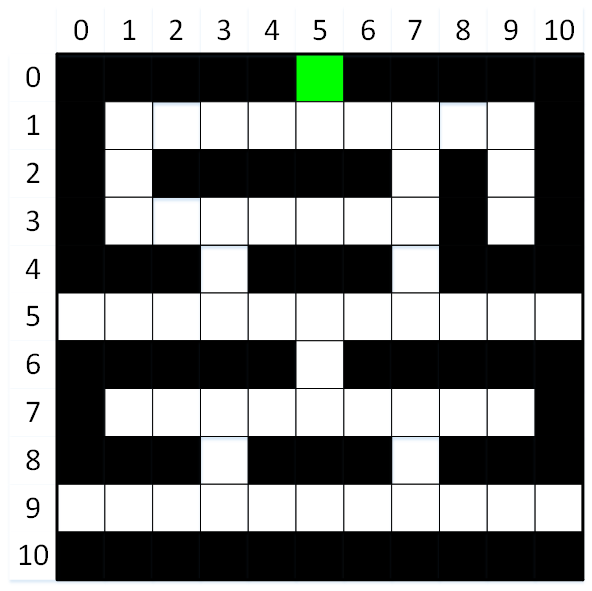

El objetivo del agente de IA es aprender el camino más corto entre el área de embalaje del artículo y todas las demás ubicaciones del almacén donde el robot puede viajar.

Como se muestra en la imagen de arriba, hay 121 estados (ubicaciones) posibles dentro del almacén. Estos estados están organizados en una cuadrícula que contiene 11 filas y 11 columnas. Por lo tanto, cada ubicación puede identificarse por su índice de fila y columna.

In [2]:
# Definir la forma del entorno (es decir, sus estados)
filas_entorno = 11
columnas_entorno = 11

# La matriz consta de 11 filas y 11 columnas (para que coincida con la forma del entorno), además de una tercera dimensión "acción".
# El valor de cada par (estado, acción) se inicializa en 0.
q_values = np.zeros((filas_entorno, columnas_entorno, 4))
# print(q_values)

# Comportamiento

Las acciones que están disponibles para el agente de IA son mover el robot en una de cuatro direcciones:

Arriba

Derecha

Abajo

Izquierda

¡Obviamente, el agente de IA debe aprender a evitar conducir hacia los lugares de almacenamiento de artículos (por ejemplo, estantes)!

In [3]:
# Definir acciones
# Códigos numéricos de acción: 0 = arriba, 1 = derecha, 2 = abajo, 3 = izquierda
acciones = ['arriba', 'derecha', 'abajo', 'izquierda']


# Recompensas

El último componente del entorno que debemos definir son las recompensas.

Para ayudar al agente de IA a aprender, a cada estado (ubicación) en el almacén se le asigna un valor de recompensa.

El agente puede comenzar en cualquier casilla blanca, pero su objetivo es siempre el mismo: ¡maximizar sus recompensas totales!

Las recompensas negativas (es decir, los castigos) se utilizan para todos los estados excepto para el objetivo.

¡Esto anima a la IA a identificar el camino más corto hacia la meta minimizando sus castigos!

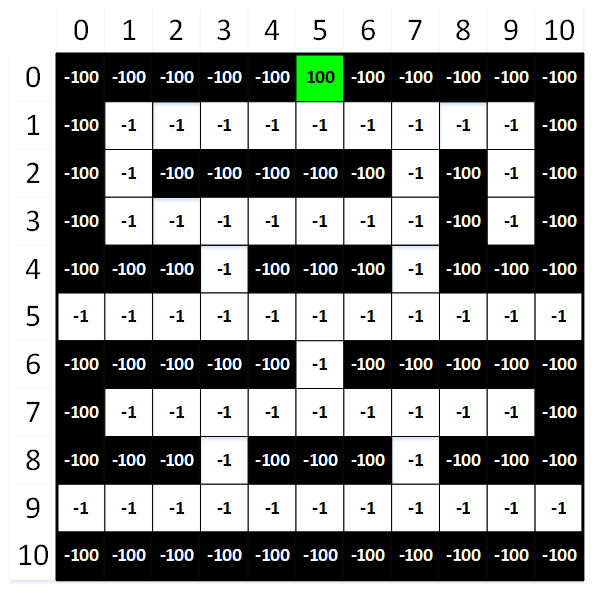

Para maximizar sus recompensas acumulativas (minimizando sus castigos acumulativos), el agente de IA necesitará encontrar los caminos más cortos entre el área de embalaje del artículo (cuadrado verde) y todas las demás ubicaciones del almacén donde el robot puede viajar (cuadrados blancos). ). ¡El agente también deberá aprender a evitar chocar contra cualquiera de las ubicaciones de almacenamiento de artículos (cuadrados negros)!

In [15]:
# Crear una matriz numpy 2D para almacenar las recompensas de cada estado.
# La matriz consta de 11 filas y 11 columnas (para que coincida con la forma del entorno), y cada valor se inicializa en -100.
recompensas = np.full((filas_entorno, columnas_entorno), -100.)
recompensas[0, 5] = 100. # establecer la recompensa para la zona de empaque (es decir, la meta) en 100

# Definir ubicaciones de los pasillos (es decir, cuadros blancos) para las filas 1 a 9
pasillos = {} # almacenar ubicaciones en un diccionario
pasillos[1] = [i for i in range(1, 10)]
pasillos[2] = [1, 7, 9]
pasillos[3] = [i for i in range(1, 8)]
pasillos[3].append(9)
pasillos[4] = [3, 7]
pasillos[5] = [i for i in range(11)]
pasillos[6] = [5]
pasillos[7] = [i for i in range(1, 10)]
pasillos[8] = [3, 7]
pasillos[9] = [i for i in range(11)]

# Establecer las recompensas para todas las ubicaciones de pasillos (es decir, cuadros blancos)
for indice_fila in range(1, 10):
  for indice_columna in pasillos[indice_fila]:
    recompensas[indice_fila, indice_columna] = -1.

# Imprimir la matriz de recompensas
for fila in recompensas:
  print(fila)


[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


# Entrenar el modelo

Nuestra siguiente tarea es que nuestro agente de IA aprenda sobre su entorno implementando un modelo Q-learning. El proceso de aprendizaje seguirá estos pasos:

1 Elija un estado aleatorio, no terminal (cuadrado blanco) para que el agente comience este nuevo episodio.

2 Elija una acción (mover hacia arriba, hacia la derecha, hacia abajo o hacia la izquierda) para el estado actual. Las acciones se elegirán utilizando un algoritmo codicioso épsilon. Este algoritmo normalmente elegirá la acción más prometedora para el agente de IA, pero ocasionalmente elegirá una opción menos prometedora para animar al agente a explorar el entorno.

3 Realice la acción elegida y pase al siguiente estado (es decir, pase a la siguiente ubicación).

4 Reciba la recompensa por mudarse al nuevo estado y calcule la diferencia temporal.

5 Actualice el valor Q para el par de acción y estado anterior.

Si el nuevo estado (actual) es un estado terminal, vaya al punto 1. De lo contrario, vaya al n.° 2.


Todo este proceso se repetirá a lo largo de 1000 episodios. Esto le brindará al agente de IA la oportunidad suficiente para aprender los caminos más cortos entre el área de empaque del artículo y todas las demás ubicaciones en el almacén donde el robot puede viajar, ¡y al mismo tiempo evitará chocar contra cualquiera de las ubicaciones de almacenamiento del artículo!

Definir funciones auxiliares

In [11]:
# Definir una función que determine si la ubicación especificada es un estado terminal
def es_estado_terminal(indice_fila_actual, indice_columna_actual):
  # Si la recompensa para esta ubicación es -1, entonces no es un estado terminal (es decir, es un 'cuadro blanco')
  if recompensas[indice_fila_actual, indice_columna_actual] == -1.:
    return False
  else:
    return True

# Definir una función que elija una ubicación de inicio aleatoria y no terminal
def obtener_ubicacion_inicial():
  # Obtener un índice de fila y columna aleatorio
  indice_fila_actual = np.random.randint(filas_entorno)
  indice_columna_actual = np.random.randint(columnas_entorno)
  # Continuar eligiendo índices de fila y columna aleatorios hasta identificar un estado no terminal
  # (es decir, hasta que el estado elegido sea un 'cuadro blanco').
  while es_estado_terminal(indice_fila_actual, indice_columna_actual):
    indice_fila_actual = np.random.randint(filas_entorno)
    indice_columna_actual = np.random.randint(columnas_entorno)
  return indice_fila_actual, indice_columna_actual

# Definir un algoritmo epsilon-greedy que elija cuál acción tomar a continuación (es decir, dónde moverse a continuación)
def obtener_siguiente_accion(indice_fila_actual, indice_columna_actual, epsilon):
  # Si un valor elegido al azar entre 0 y 1 es menor que epsilon,
  # entonces elige el valor más prometedor de la tabla Q para este estado.
  if np.random.random() < epsilon:
    return np.argmax(q_values[indice_fila_actual, indice_columna_actual])
  else: # elige una acción al azar
    return np.random.randint(4)

# Definir una función que obtenga la próxima ubicación en función de la acción elegida
def obtener_siguiente_ubicacion(indice_fila_actual, indice_columna_actual, indice_accion):
  nueva_indice_fila = indice_fila_actual
  nueva_indice_columna = indice_columna_actual
  if acciones[indice_accion] == 'arriba' and indice_fila_actual > 0:
    nueva_indice_fila -= 1
  elif acciones[indice_accion] == 'derecha' and indice_columna_actual < columnas_entorno - 1:
    nueva_indice_columna += 1
  elif acciones[indice_accion] == 'abajo' and indice_fila_actual < filas_entorno - 1:
    nueva_indice_fila += 1
  elif acciones[indice_accion] == 'izquierda' and indice_columna_actual > 0:
    nueva_indice_columna -= 1
  return nueva_indice_fila, nueva_indice_columna

# Definir una función que obtenga el camino más corto entre cualquier ubicación dentro del almacén que
# el robot puede recorrer y la ubicación de empaque del artículo.
def obtener_camino_mas_corto(indice_fila_inicial, indice_columna_inicial):
  # Retorna de inmediato si esta es una ubicación de inicio no válida
  if es_estado_terminal(indice_fila_inicial, indice_columna_inicial):
    return []
  else: # si esta es una ubicación de inicio 'legal'
    indice_fila_actual, indice_columna_actual = indice_fila_inicial, indice_columna_inicial
    camino_mas_corto = []
    camino_mas_corto.append([indice_fila_actual, indice_columna_actual])
    # Continuar moviéndose a lo largo del camino hasta que lleguemos al objetivo (es decir, la ubicación de empaque del artículo)
    while not es_estado_terminal(indice_fila_actual, indice_columna_actual):
      # Obtener la mejor acción a tomar
      indice_accion = obtener_siguiente_accion(indice_fila_actual, indice_columna_actual, 1.)
      # Moverse a la siguiente ubicación en el camino y agregar la nueva ubicación a la lista
      indice_fila_actual, indice_columna_actual = obtener_siguiente_ubicacion(indice_fila_actual, indice_columna_actual, indice_accion)
      camino_mas_corto.append([indice_fila_actual, indice_columna_actual])
    return camino_mas_corto


# **Entrene al agente de IA usando Q-Learning**

In [12]:
# Definir parámetros de entrenamiento
epsilon = 0.9 # el porcentaje de veces que debemos tomar la mejor acción (en lugar de una acción al azar)
factor_descuento = 0.9 # factor de descuento para recompensas futuras
tasa_aprendizaje = 0.9 # la tasa a la que el agente de IA debe aprender

# Ejecutar 1000 episodios de entrenamiento
for episodio in range(1000):
  # Obtener la ubicación de inicio para este episodio
  indice_fila, indice_columna = obtener_ubicacion_inicial()

  # Continuar tomando acciones (es decir, moviéndose) hasta que lleguemos a un estado terminal
  # (es decir, hasta que lleguemos a la zona de empaque de artículos o choquemos contra una ubicación de almacenamiento de artículos)
  while not es_estado_terminal(indice_fila, indice_columna):
    # Elegir qué acción tomar (es decir, hacia dónde moverse a continuación)
    indice_accion = obtener_siguiente_accion(indice_fila, indice_columna, epsilon)

    # Realizar la acción elegida y transicionar al siguiente estado (es decir, moverse a la siguiente ubicación)
    indice_fila_anterior, indice_columna_anterior = indice_fila, indice_columna # almacenar los índices de fila y columna anteriores
    indice_fila, indice_columna = obtener_siguiente_ubicacion(indice_fila, indice_columna, indice_accion)

    # Recibir la recompensa por moverse al nuevo estado y calcular la diferencia temporal
    recompensa = recompensas[indice_fila, indice_columna]
    antiguo_valor_q = q_values[indice_fila_anterior, indice_columna_anterior, indice_accion]
    diferencia_temporal = recompensa + (factor_descuento * np.max(q_values[indice_fila, indice_columna])) - antiguo_valor_q

    # Actualizar el valor Q para el par estado y acción anterior
    nuevo_valor_q = antiguo_valor_q + (tasa_aprendizaje * diferencia_temporal)
    q_values[indice_fila_anterior, indice_columna_anterior, indice_accion] = nuevo_valor_q

print('¡Entrenamiento completado!')

¡Entrenamiento completado!


# **Obtenga caminos más cortos**

Ahora que el agente de IA ha sido completamente capacitado, podemos ver lo que ha aprendido mostrando el camino más corto entre cualquier ubicación del almacén donde el robot puede viajar y el área de embalaje del artículo.

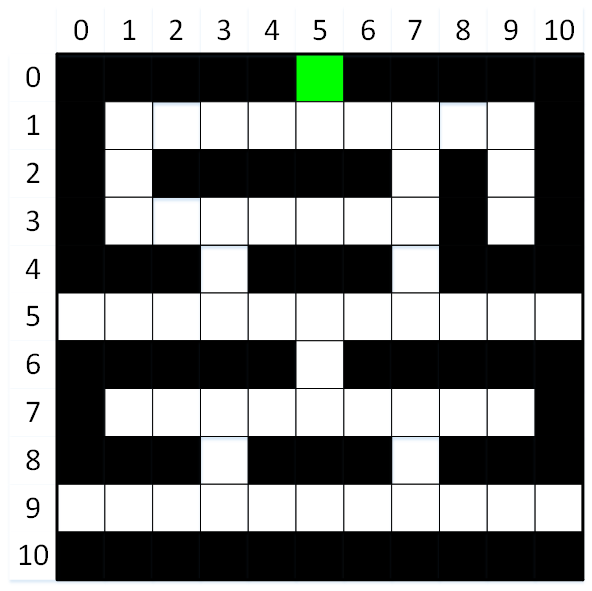

Ejecute la celda de código a continuación para probar algunas ubicaciones de inicio diferentes.

In [13]:
# Mostrar algunos de los caminos más cortos
print(obtener_camino_mas_corto(3, 9)) # comenzando en la fila 3, columna 9
# print(obtener_camino_mas_corto(5, 0)) # comenzando en la fila 5, columna 0
# print(obtener_camino_mas_corto(9, 5)) # comenzando en la fila 9, columna 5


[[3, 9], [2, 9], [1, 9], [1, 8], [1, 7], [1, 6], [1, 5], [0, 5]]


# Finalmente...

Es fantástico que nuestro robot pueda tomar automáticamente el camino más corto desde cualquier ubicación "legal" del almacén hasta el área de embalaje del artículo. Pero ¿qué pasa con el escenario opuesto?

Dicho de otra manera, nuestro robot actualmente puede entregar un artículo desde cualquier lugar del almacén hasta el área de embalaje, pero después de entregar el artículo, tendrá que viajar desde el área de embalaje a otra ubicación del almacén para recoger el siguiente artículo.

No se preocupe: este problema se resuelve fácilmente simplemente invirtiendo el orden del camino más corto.

Ejecute la siguiente celda de código para ver un ejemplo:

In [8]:
# Obtener el camino más corto hacia la fila 5, columna 2 y luego invertirlo
camino = obtener_camino_mas_corto(5, 2) # ir a la fila 5, columna 2
camino.reverse()
print(camino)

[[0, 5], [1, 5], [1, 6], [1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [5, 6], [5, 5], [5, 4], [5, 3], [5, 2]]
